In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import hiive.mdptoolbox.mdp, hiive.mdptoolbox.example
import gym

In [2]:
def write_graphs(alg_name, stats, value, problem):
    plt.plot([s['Time'] for s in stats], "x-", label=str(value))
    plt.xlabel("Number of Iterations")
    plt.ylabel("Time in Seconds")
    plt.title(alg_name + ": " + problem + " : Time vs Number of Iterations")
    plt.legend(loc="lower right", title="Gamma Values")
    plt.show()

    plt.plot([s['Error'] for s in stats], "x-", label=str(value))
    plt.xlabel("Number of Iterations")
    plt.ylabel("Error Value")
    plt.title(alg_name + ": " + problem + " : Error vs Number of Iterations")
    plt.legend(loc="upper right", title="Gamma Values")
    plt.show()

    plt.plot([s['Reward'] for s in stats], "x-", label=str(value))
    plt.xlabel("Number of Iterations")
    plt.ylabel("Reward Value")
    plt.title(alg_name + ": " + problem + " : Reward vs Number of Iterations")
    plt.legend(loc="lower right", title="Gamma Values")
    plt.show()

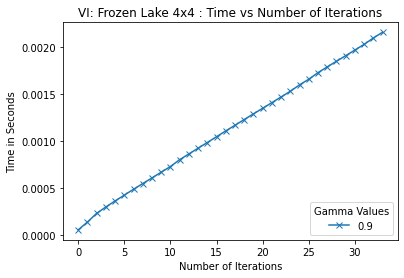

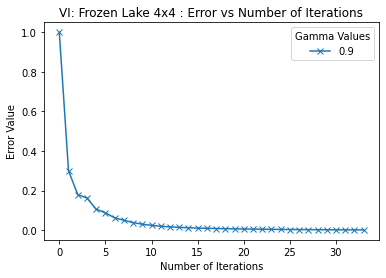

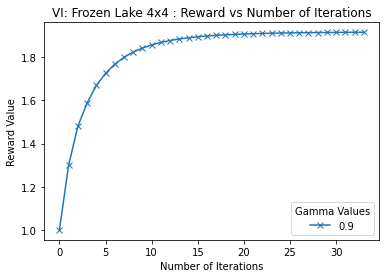

In [3]:
env = gym.make('FrozenLake-v0')
P = np.zeros((env.nA, env.nS, env.nS))
R = np.zeros((env.nS, env.nA))
for i in env.P:
    for j in env.P[i]:
        for a, b, r, _ in env.P[i][j]:
            P[j][i][b] += a
            R[i][j] = r

stats = hiive.mdptoolbox.mdp.ValueIteration(P, R, 0.9, max_iter=1000).run()
write_graphs("VI", stats, 0.9, "Frozen Lake 4x4")

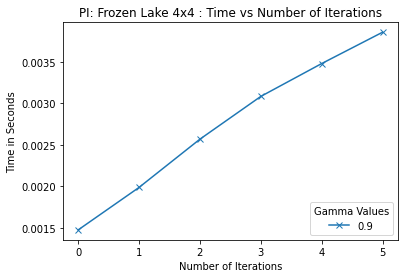

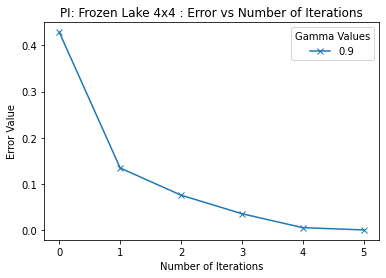

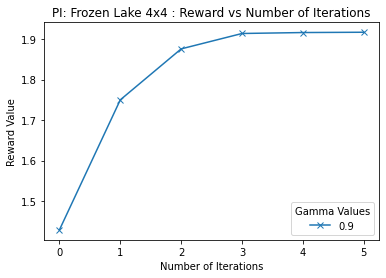

In [4]:
env = gym.make('FrozenLake-v0')
P = np.zeros((env.nA, env.nS, env.nS))
R = np.zeros((env.nS, env.nA))
for i in env.P:
    for j in env.P[i]:
        for a, b, r, _ in env.P[i][j]:
            P[j][i][b] += a
            R[i][j] = r

stats = hiive.mdptoolbox.mdp.PolicyIteration(P, R, 0.9, max_iter=1000).run()
write_graphs("PI", stats, 0.9, "Frozen Lake 4x4")

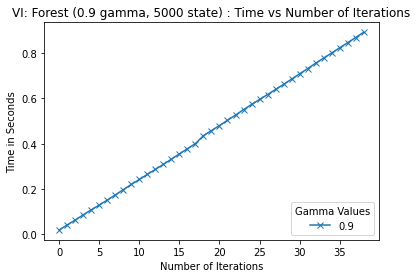

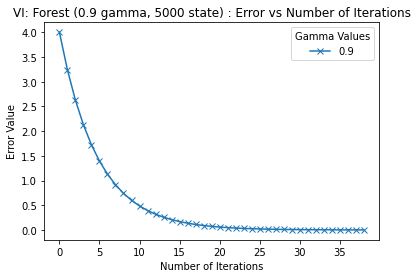

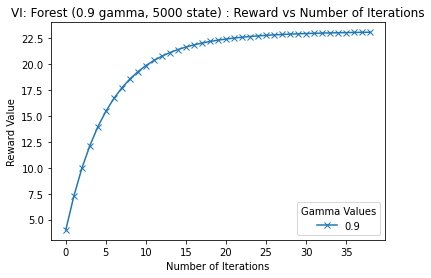

In [5]:
P, R = hiive.mdptoolbox.example.forest(5000)
stats = hiive.mdptoolbox.mdp.ValueIteration(P, R, 0.9, max_iter=1000).run()
write_graphs("VI", stats, 0.9, "Forest (0.9 gamma, 5000 state)")

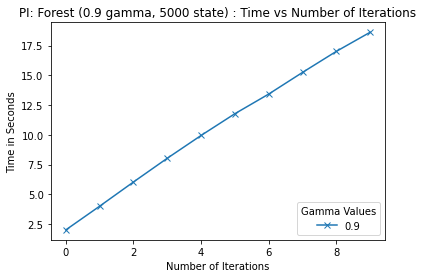

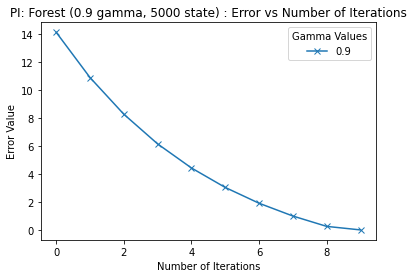

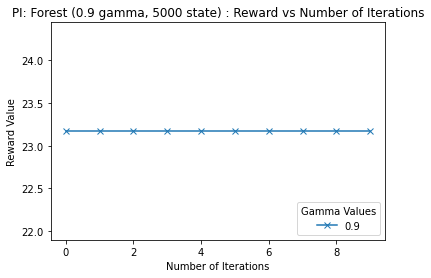

In [6]:
P, R = hiive.mdptoolbox.example.forest(5000)
stats = hiive.mdptoolbox.mdp.PolicyIteration(P, R, 0.9, max_iter=1000).run()
write_graphs("PI", stats, 0.9, "Forest (0.9 gamma, 5000 state)")

In [7]:
env = gym.make('FrozenLake-v0')
P = np.zeros((env.nA, env.nS, env.nS))
R = np.zeros((env.nS, env.nA))
for i in env.P:
    for j in env.P[i]:
        for a, b, r, _ in env.P[i][j]:
            P[j][i][b] += a
            R[i][j] = r

stat_dict = {}
for i in [0.1, 0.3, 0.5, 0.9]:
    stat_dict[i] = hiive.mdptoolbox.mdp.QLearning(P, R, gamma=i, n_iter=20000).run()

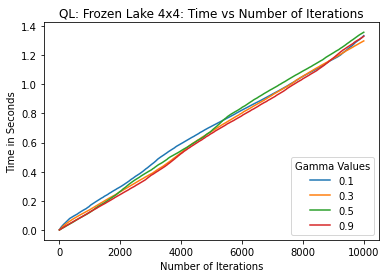

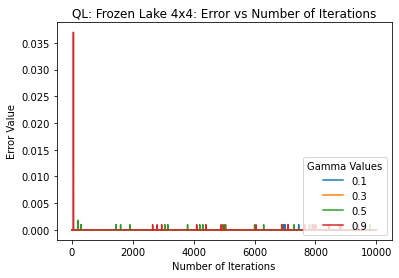

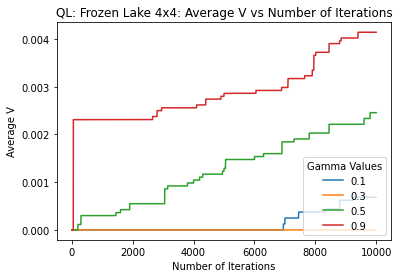

In [8]:
plt.xlabel("Number of Iterations")
plt.ylabel("Time in Seconds")
plt.title("QL: Frozen Lake 4x4: Time vs Number of Iterations")
for i in stat_dict:
    plt.plot([s['Time'] for s in stat_dict[i]], "-", label=i)
plt.legend(loc="lower right", title="Gamma Values")
plt.show()

plt.xlabel("Number of Iterations")
plt.ylabel("Error Value")
plt.title("QL: Frozen Lake 4x4: Error vs Number of Iterations")
for i in stat_dict:
    plt.plot([s['Error'] for s in stat_dict[i]], "-", label=i)
plt.legend(loc="lower right", title="Gamma Values")
plt.show()

plt.xlabel("Number of Iterations")
plt.ylabel("Average V")
plt.title("QL: Frozen Lake 4x4: Average V vs Number of Iterations")
for i in stat_dict:
    plt.plot([s['Mean V'] for s in stat_dict[i]], "-", label=i)
plt.legend(loc="lower right", title="Gamma Values")
plt.show()


In [9]:
P, R = hiive.mdptoolbox.example.forest(S=5000)
stat_dict = {}
for i in [0.1, 0.3, 0.5, 0.9]:
    stat_dict[i] = hiive.mdptoolbox.mdp.QLearning(P, R, gamma=i, n_iter=20000).run()

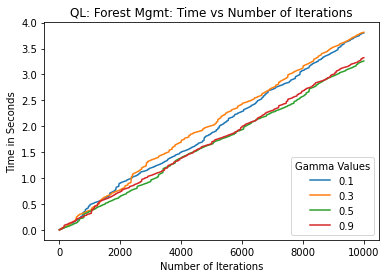

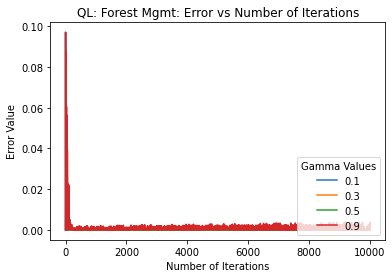

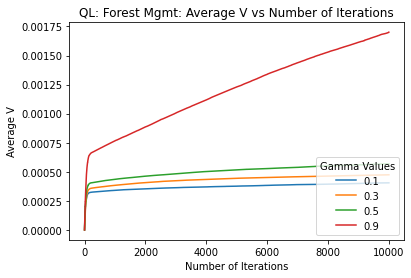

In [10]:
plt.xlabel("Number of Iterations")
plt.ylabel("Time in Seconds")
plt.title("QL: Forest Mgmt: Time vs Number of Iterations")
for i in stat_dict:
    plt.plot([s['Time'] for s in stat_dict[i]], "-", label=i)
plt.legend(loc="lower right", title="Gamma Values")
plt.show()

plt.xlabel("Number of Iterations")
plt.ylabel("Error Value")
plt.title("QL: Forest Mgmt: Error vs Number of Iterations")
for i in stat_dict:
    plt.plot([s['Error'] for s in stat_dict[i]], "-", label=i)
plt.legend(loc="lower right", title="Gamma Values")
plt.show()

plt.xlabel("Number of Iterations")
plt.ylabel("Average V")
plt.title("QL: Forest Mgmt: Average V vs Number of Iterations")
for i in stat_dict:
    plt.plot([s['Mean V'] for s in stat_dict[i]], "-", label=i)
plt.legend(loc="lower right", title="Gamma Values")
plt.show()
